<a href="https://colab.research.google.com/github/brkent/2023-VLASS-plots/blob/main/VLASS_Data_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Publication Citations - the first five years

FIRST:
https://ui.adsabs.harvard.edu/abs/1995ApJ...450..559B/abstract

NVSS:
https://ui.adsabs.harvard.edu/abs/1998AJ....115.1693C/abstract

VLASS:
https://ui.adsabs.harvard.edu/abs/2020PASP..132c5001L/abstract

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
datafirst = pd.read_csv("https://www.cv.nrao.edu/~bkent/astro/FIRST-countries.csv")
datanvss  = pd.read_csv("https://www.cv.nrao.edu/~bkent/astro/NVSS-countries.csv")
datavlass = pd.read_csv("https://www.cv.nrao.edu/~bkent/astro/VLASS-countries-2.csv")

In [ ]:
datafirst

In [ ]:
datafirst.Country.value_counts()

In [5]:
len(datafirst.Country.value_counts())

20

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world['name'] != 'Antarctica']
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

In [ ]:
world.plot(figsize=(12,8));

In [8]:
vlass=datavlass.Country.value_counts().to_frame(name='Number').reset_index()

In [9]:
world_final = world.merge(vlass, how="left", left_on=['name'], right_on=['index'])

In [ ]:
world_final.head()

Text(0.5, 1.0, 'VLASS Lacy et al. 2020  (2019-2023)\n(324 papers; 2641 refereed authors and co-authors from 49 countries)')

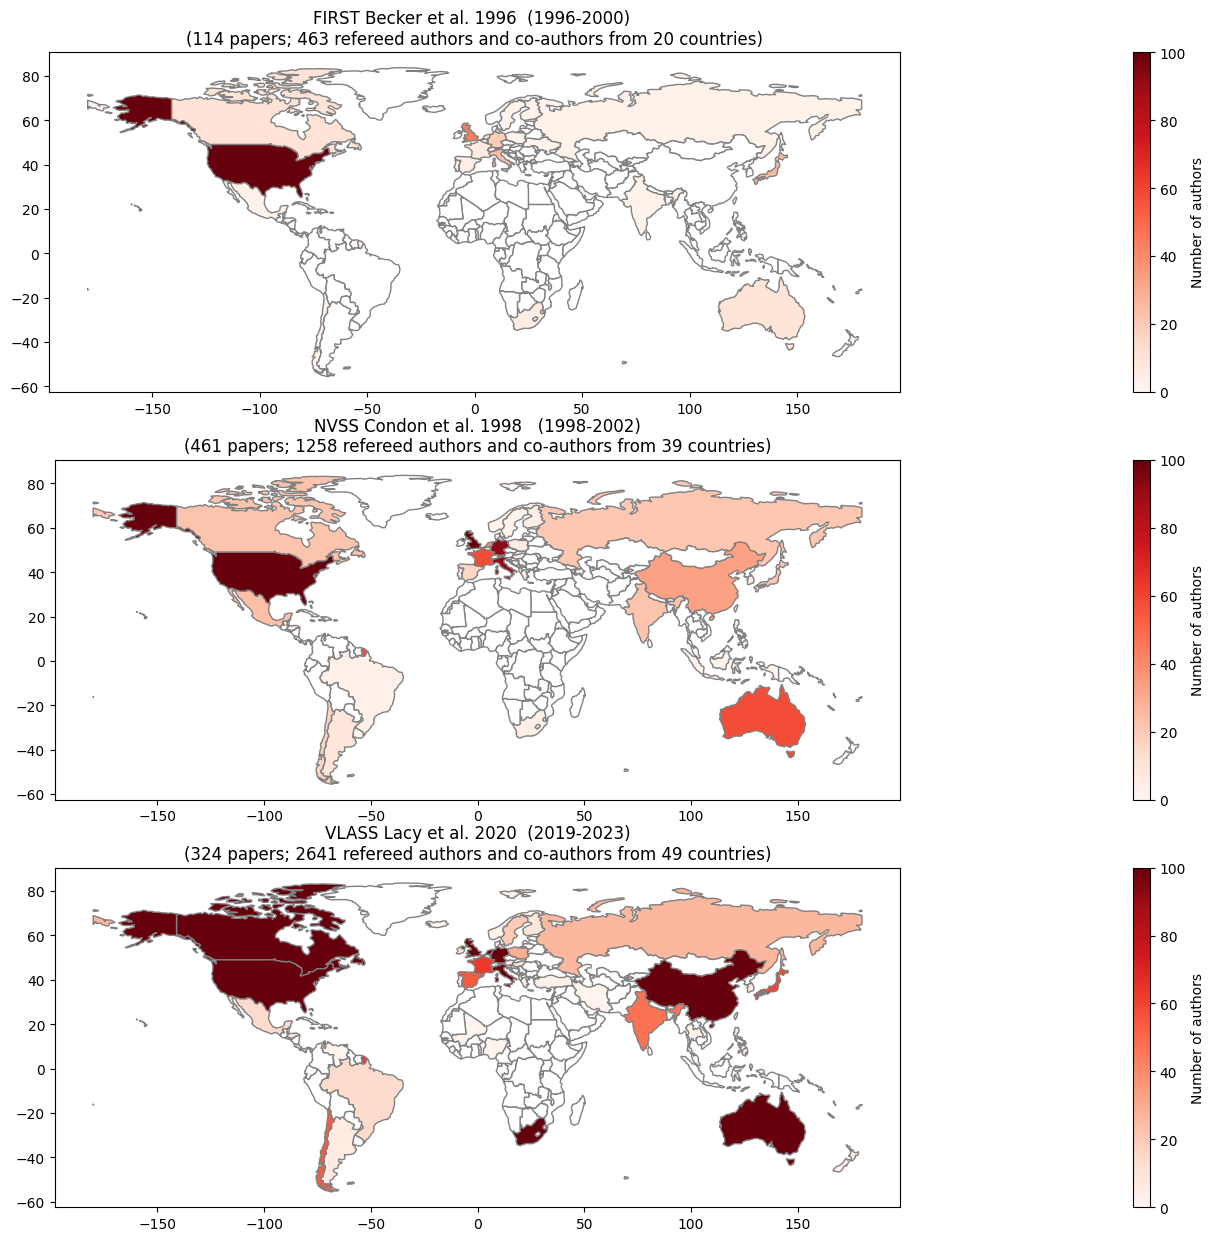

In [11]:
# normalize color
from matplotlib.colors import TwoSlopeNorm
import matplotlib.ticker as mticker

# https://gis.stackexchange.com/questions/330008/center-normalize-choropleth-colors-in-geopandas
vmin, vmax, vcenter = 0, 100, 50
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'Reds'#'RdBu_r'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)


#https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data
plt.figure(figsize=(60,15))

ax1 = plt.subplot(311)
first = datafirst.Country.value_counts().to_frame(name='Number').reset_index()
world_final_first = world.merge(first, how="left", left_on=['name'], right_on=['index'])
world_final_first.plot("Number", legend=True, missing_kwds={"color":"white"},
                 legend_kwds={"label": "Number of authors"}, cmap=cmap, #cmap=plt.cm.Greens,
                 edgecolor='grey', ax=ax1, norm=norm)
plt.title("FIRST Becker et al. 1996  (1996-2000) \n(114 papers; {!s} refereed authors and co-authors from {!s} countries)".format(len(datafirst), len(first)))


ax2 = plt.subplot(312)
nvss = datanvss.Country.value_counts().to_frame(name='Number').reset_index()
world_final_nvss = world.merge(nvss, how="left", left_on=['name'], right_on=['index'])
world_final_nvss.plot("Number", legend=True, missing_kwds={"color":"white"},
                 legend_kwds={"label": "Number of authors"}, cmap=cmap, #cmap=plt.cm.Blues,
                 edgecolor='grey', ax=ax2, norm=norm)
plt.title("NVSS Condon et al. 1998   (1998-2002)\n(461 papers; {!s} refereed authors and co-authors from {!s} countries)".format(len(datanvss), len(nvss)))

ax3 = plt.subplot(313)
vlass = datavlass.Country.value_counts().to_frame(name='Number').reset_index()
world_final_vlass = world.merge(vlass, how="left", left_on=['name'], right_on=['index'])
world_final_vlass.plot("Number", legend=True, missing_kwds={"color":"white"},
                 legend_kwds={"label": "Number of authors"}, cmap=cmap, #cmap=plt.cm.OrRd,
                 edgecolor='grey', ax=ax3, norm=norm)
plt.title("VLASS Lacy et al. 2020  (2019-2023)\n(324 papers; {!s} refereed authors and co-authors from {!s} countries)".format(len(datavlass), len(vlass)))